In [127]:
import pandas as pd
import datetime as dt

In [128]:
ques_morning_dams = pd.read_csv('./datas/questionaire_data/ques_morning_dams.csv')
ques_morning_time = pd.read_csv('./datas/questionaire_data/ques_morning/ques_morning_dams.csv')

In [129]:
ques_morning_time['Date'] = pd.to_datetime(ques_morning_time['datetime']).dt.date
ques_morning_dams['Date'] = pd.to_datetime(ques_morning_dams['Date']).dt.date
ques_morning_date = ques_morning_time[['datetime','user_id','Date']]
ques_dams_m = pd.merge(ques_morning_dams,ques_morning_date,on=['Date','user_id'],how='left')

In [130]:
ques_dams_m = ques_dams_m.drop(['Unnamed: 0.1','Unnamed: 0','record_type_id'],axis=1)
ques_dams_m = ques_dams_m[~ques_dams_m.duplicated()]

In [131]:
#timezoneを東京に合わせる
ques_dams_m.index = pd.DatetimeIndex(ques_dams_m.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_dams_m['datetime_jp'] = ques_dams_m.index
ques_dams_m['Date_jp'] = pd.to_datetime(ques_dams_m['datetime_jp']).dt.date
ques_dams_m=ques_dams_m[(ques_dams_m['Date_jp']>=dt.date(2021,1,12))]
ques_dams_m['hour'] = pd.to_datetime(ques_dams_m['datetime_jp']).dt.hour

<AxesSubplot:>

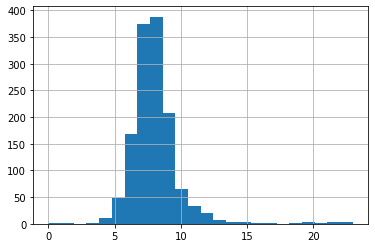

In [132]:
ques_dams_m['hour'].hist(bins=24)

In [133]:
#damsの評価指標を追加
#肯定的気分
ques_dams_m['positive_score']=(ques_dams_m['haturatu']+ques_dams_m['uresii']+ques_dams_m['tanosii'])/3
ques_dams_m['depressive_score']=(ques_dams_m['kurai']+ques_dams_m['iyana']+ques_dams_m['sizunda'])/3
ques_dams_m['anxious_score']=(ques_dams_m['kigakarina']+ques_dams_m['fuan']+ques_dams_m['sinpaina'])/3

In [144]:
#3，６，９時間前の時刻を追加
ques_dams_m = ques_dams_m.reset_index(drop=True)
ques_dams_m['datetime_jp_before3'] =  ques_dams_m['datetime_jp']-dt.timedelta(hours=3)
ques_dams_m['datetime_jp_before6'] =  ques_dams_m['datetime_jp']-dt.timedelta(hours=6)
ques_dams_m['datetime_jp_before9'] =  ques_dams_m['datetime_jp']-dt.timedelta(hours=9)

In [147]:
# ques_dams_m.drop(['Date','datetime'],axis=1).to_csv('./datas/preprocessed_questionaire/ques_morning_dams.csv')

# 自覚症調べ

In [167]:
ques_bodyfatigue = pd.read_csv('./datas/questionaire_data/ques_morning/ques_morning_bodyfatigue.csv')
ques_bodyfatigue

,Unnamed: 0,datetime,user_id,activity,record_type_id,name,value,value_bodyfatigue
0,11,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,35.0,頭がおもい,0: まったくあてはまらない,0.0
1,12,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,36.0,気分がわるい,0: まったくあてはまらない,0.0
2,13,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,37.0,頭がいたい,0: まったくあてはまらない,0.0
3,14,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,38.0,肩がこる,3: あてはまる,3.0
4,15,2021-01-11 00:14:59.165000+00:00,29,朝のアンケート,39.0,頭がぼんやりする,3: あてはまる,3.0
...,...,...,...,...,...,...,...,...
20160,172164,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,45.0,全身がだるい,0: まったくあてはまらない,0.0
20161,172165,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,46.0,腕がだるい,0: まったくあてはまらない,0.0
20162,172166,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,47.0,横になりたい,0: まったくあてはまらない,0.0
20163,172167,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,48.0,腰がいたい,0: まったくあてはまらない,0.0


In [168]:
ques_bodyfatigue.index = pd.DatetimeIndex(ques_bodyfatigue.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_bodyfatigue['datetime_jp'] = ques_bodyfatigue.index
ques_bodyfatigue['Date_jp'] = pd.to_datetime(ques_bodyfatigue['datetime_jp']).dt.date
ques_bodyfatigue=ques_bodyfatigue[(ques_bodyfatigue['Date_jp']>=dt.date(2021,1,12))]
ques_bodyfatigue['hour'] = pd.to_datetime(ques_bodyfatigue['datetime_jp']).dt.hour

<ipython-input-168-599478827ba8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_bodyfatigue['hour'] = pd.to_datetime(ques_bodyfatigue['datetime_jp']).dt.hour


<AxesSubplot:>

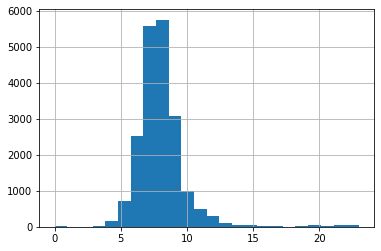

In [169]:
ques_bodyfatigue['hour'].hist(bins=24)

In [170]:
# ques_bodyfatigue['atama_omoi']=0
# ques_bodyfatigue['kibun_warui']=0
# ques_bodyfatigue['atama_itai']=0
# ques_bodyfatigue['kata_koru']=0
# ques_bodyfatigue['akubi_deru']=0
# ques_bodyfatigue['teyayubi_itai']=0
# ques_bodyfatigue['memai_suru']=0
# ques_bodyfatigue['nemui']=0
# ques_bodyfatigue['yaruki_tobosii']=0
# ques_bodyfatigue['ude_darui']=0
# ques_bodyfatigue['yoko_naritai']=0
# ques_bodyfatigue['kosi_itai']=0
# ques_bodyfatigue['asi_darui']=0
# ques_bodyfatigue['atama_bonyari']=0
# ques_bodyfatigue['zensin_darui']=0

In [178]:
ques_bodyfatigue['name'].unique()
ques_bodyfatigue = ques_bodyfatigue.reset_index(drop=True)
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='頭がおもい', 'atama_omoi'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='気分がわるい', 'kibun_warui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='頭がいたい', 'atama_itai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='肩がこる', 'kata_koru'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='あくびがでる', 'akubi_deru'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='手や指がいたい', 'teyayubi_itai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='めまいがする', 'memai_suru'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='ねむい', 'nemui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='やる気がとぼしい', 'yaruki_tobosii'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='腕がだるい', 'ude_darui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='横になりたい', 'yoko_naritai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='腰がいたい', 'kosi_itai'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='足がだるい', 'asi_darui'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='頭がぼんやりする', 'atama_bonyari'] =ques_bodyfatigue['value_bodyfatigue']
ques_bodyfatigue.loc[ques_bodyfatigue['name']=='全身がだるい', 'zensin_darui'] =ques_bodyfatigue['value_bodyfatigue']

In [180]:
ques_bodyfatigue

,Unnamed: 0,datetime,user_id,activity,record_type_id,name,value,value_bodyfatigue,datetime_jp,Date_jp,...,teyayubi_itai,memai_suru,nemui,yaruki_tobosii,ude_darui,yoko_naritai,kosi_itai,asi_darui,atama_bonyari,zensin_darui
0,56,2021-01-12 03:19:00+00:00,82,朝のアンケート,35.0,頭がおもい,2: どちらともいえない,2.0,2021-01-12 12:19:00+09:00,2021-01-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57,2021-01-12 03:19:00+00:00,82,朝のアンケート,36.0,気分がわるい,2: どちらともいえない,2.0,2021-01-12 12:19:00+09:00,2021-01-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58,2021-01-12 03:19:00+00:00,82,朝のアンケート,37.0,頭がいたい,0: まったくあてはまらない,0.0,2021-01-12 12:19:00+09:00,2021-01-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59,2021-01-12 03:19:00+00:00,82,朝のアンケート,38.0,肩がこる,4: 非常にあてはまる,4.0,2021-01-12 12:19:00+09:00,2021-01-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,2021-01-12 03:19:00+00:00,82,朝のアンケート,40.0,あくびがでる,4: 非常にあてはまる,4.0,2021-01-12 12:19:00+09:00,2021-01-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,172164,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,45.0,全身がだるい,0: まったくあてはまらない,0.0,2021-01-30 08:44:50.116000+09:00,2021-01-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20027,172165,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,46.0,腕がだるい,0: まったくあてはまらない,0.0,2021-01-30 08:44:50.116000+09:00,2021-01-30,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
20028,172166,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,47.0,横になりたい,0: まったくあてはまらない,0.0,2021-01-30 08:44:50.116000+09:00,2021-01-30,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
20029,172167,2021-01-29 23:44:50.116000+00:00,41,朝のアンケート,48.0,腰がいたい,0: まったくあてはまらない,0.0,2021-01-30 08:44:50.116000+09:00,2021-01-30,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
